## Projet 5 : Optimisez la gestion des données d'une boutique avec R ou Python

### Mission: 

>- Premièrement, rapprocher deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...). 
>- Deuxièmement, calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.
>- Troisièmement, effectuer une analyse sur la variable 'prix' afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

## Sommaire :


### Partie 1: Importation, nettoyage et préparation des données

#### [1) Importation des données](#A1)
#### [2) Nettoyage et préparation des données](#A2)

 - [1.Table Produit](#A2.1)
 - [2.Table Liaison](#A2.2)
 - [3.Table Web](#A2.3)
 
### Partie 2: Analyses des données

#### [1) Rapprocher l'export de l’ERP (Produit) et celui de l’outil de CMS (Web)](#B1)

#### [2) Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne](#B2)

- [2.1. Le Chiffre d’Affaires par Produit](#B2.1)
- [2.2. Le Chiffre d’Affaires Total Réalisé en Ligne](#B2.2)

#### [3) Effectuer une analyse sur la variable 'prix' afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité](#B3)

- [3.1. Détection et listing des valeurs aberrantes](#B3.1)
- [3.2. Représentation graphique des valeurs aberrantes](#B3.2)


# Partie 1: Importation, nettoyage et préparation des données

## <a id="A1">1) Importation des données</a>


In [1]:
# Import des librairies dont nous aurons besoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
# chargement des données des fichiers excel

produit = pd.read_excel('erp.xlsx')
liaison = pd.read_excel('liaison.xlsx')
web     = pd.read_excel('web.xlsx')

In [3]:
# Mise en forme du notebook pour une bonne lecture :

# 1. formatage des résultats avec des séparateurs de milliers

# 2. création d'une classe nommée 'color' pour mettre en forme nos résultats.
class color:
   BLUE = '\033[94m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## <a id="A2">2) Nettoyage et préparation des données</a>

### <a id="A2.1">1.Table Produit</a>

In [4]:
# Affichage de la table Produit

produit = pd.read_excel('erp.xlsx')
produit.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# Vérification des dimensions du dataframe

produit.shape

(825, 5)

In [6]:
# Renommage des variables

produit.rename( columns ={'product_id': 'ref_produit', 'onsale_web': 'enVente', 
                          'price': 'prix', 'stock_quantity': 'quantite_stock'}, inplace = True)
produit.head()

,ref_produit,enVente,prix,quantite_stock,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [7]:
# Vérificaton des valeurs manquantes

produit.isnull().sum()

ref_produit       0
enVente           0
prix              0
quantite_stock    0
stock_status      0
dtype: int64

In [8]:
# Vérification des doublons
# Test de la validité de la variable 'ref_produit'  comme clé primaire

doublons_produit = produit.duplicated(subset = 'ref_produit', keep = False).sum()

if doublons_produit == 0:
    print('La variable', color.BOLD+ " 'ref_produit' est une clé primaire valide." +color.END)
else:
    print('La variable', color.BOLD+ " 'ref_produit' n'est pas une clé primaire valide." +color.END)

La variable  'ref_produit' est une clé primaire valide.


In [9]:
# Vérification des erreurs de type

produit.dtypes

ref_produit         int64
enVente             int64
prix              float64
quantite_stock      int64
stock_status       object
dtype: object

In [10]:
# Conversion du type de la variable 'prix' en integer

produit['prix'] = produit['prix'].astype(int)
print('Type de la variable', color.BOLD+ "'prix' :", produit['prix'].dtypes)

Type de la variable 'prix' : int32


In [11]:
# Vérification des valeurs aberrantes et atypiques

produit.describe()

,ref_produit,enVente,prix,quantite_stock
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.026667,26.496970
std,902.644635,0.337506,26.867967,45.892422
min,3847.000000,0.000000,5.000000,0.000000
25%,4348.000000,1.000000,14.000000,1.000000
50%,4907.000000,1.000000,24.000000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


### <a id="A2.2">2.Table Liaison</a>

In [12]:
# Affichage des données de Liaison

liaison = pd.read_excel('liaison.xlsx')
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [13]:
# Vérification des dimensions du dataframe

liaison.shape

(825, 2)

In [14]:
# Renommage des variables 

liaison.rename(columns = {'product_id': 'ref_produit', 'id_web': 'ref_web'}, inplace = True)
liaison.head()

,ref_produit,ref_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [15]:
# Vérification des Valeurs manquantes

display(liaison.isnull().sum())
print('La variable', color.BOLD+ " 'ref_web' contient ", liaison['ref_web'].isnull().sum(), 'valeurs manquantes.'+color.END)

ref_produit     0
ref_web        91
dtype: int64

La variable  'ref_web' contient  91 valeurs manquantes.


In [16]:
# Vérification des doublons
# Test de la validité de la variable 'ref_produit'  comme clé primaire

doublons_liaison = liaison.duplicated(subset = 'ref_produit', keep=False).sum()

if doublons_liaison == 0:
    print('La variable', color.BOLD+ " 'ref_produit' est une clé primaire valide." +color.END)
else:
    print('La variable', color.BOLD+ " 'ref_produit' n'est pas une clé primaire valide." +color.END)

La variable  'ref_produit' est une clé primaire valide.


In [17]:
# Vérification des erreurs de type

liaison.dtypes

ref_produit     int64
ref_web        object
dtype: object

### <a id="A2.3">3.Table Web</a>

In [18]:
# Affichage des données de vente

web = pd.read_excel('web.xlsx')
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# Vérification des dimensions du dataframe

web.shape

(1513, 28)

In [20]:
# Liste des 28 variables

web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [21]:
# Renommage de certaines variables importantes pour l'analyse

web.rename(columns = {'sku': 'ref_web', 'post_title': 'nom_produit', 
                        'post_excerpt': 'description', 'total_sales': 'nbre_ventes'}, inplace = True)
web.columns

Index(['ref_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'nbre_ventes', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'nom_produit', 'description',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [22]:
# Vérification des Valeurs manquantes

web.isnull().sum()

ref_web                    85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
nbre_ventes                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
nom_produit                83
description               797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [23]:
# Affichage des lignes avec des valeurs manquantes sur la clé primaire 'ref_web'

web.loc[web['ref_web'].isnull()]

,ref_web,virtual,downloadable,rating_count,average_rating,nbre_ventes,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>La table **web contient 85 lignes vides**. Pour les besoins de l'analyse, la variable **'ref_web'** servira de **clé de jointure** entre les tables **'web'** et **'liaison'.** D'où  la nécessité de **supprimer les lignes sans référence web** pour éviter les erreurs et incohérences dans les résultats.

In [24]:
# Suppression des lignes avec les valeurs manquantes dans la clé primaire 'ref_web'

web.drop(web[web['ref_web'].isnull()].index, inplace = True)
print('La Table Web contient désormais:',color.BOLD+ f"{web.shape[0]:,}",'lignes.')

La Table Web contient désormais: 1,428 lignes.


In [25]:
# Vérification des doublons

doublons_web = web.duplicated(subset = 'ref_web').sum()
print('Nombre de doublons:', doublons_web)

Nombre de doublons: 714


> Nous constatons que la moitié des lignes de la table **web** est constituée de doublons. Ce qui implique de **vérifier l'origine du problème dans les autres variables.**

> Après vérification, la variable **post_type** contient deux valeurs **'product'** ou **'attachment'** par ligne. Un **filtrage** sur cette variable est nécessaire pour **détecter les doublons.**

In [26]:
# Affichage des lignes avec filtre post_type = 'product'

web.loc[web['post_type']=='product']

,ref_web,virtual,downloadable,rating_count,average_rating,nbre_ventes,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


>Après le **filtrage sur post_type = 'product**, nous constatons que la **table web est réduite de moitié.** Ce qui signifie que **l'autre moitié est constituée de doublons** générés par la valeur **'attachment'**. Nous allons donc examiner les lignes contenant cette valeur. 

In [27]:
# Affichage des lignes avec filtre post_type = 'attachment'

web.loc[web['post_type']=='attachment']

,ref_web,virtual,downloadable,rating_count,average_rating,nbre_ventes,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


>**Les lignes filtrées** sur la valeur **'attachment'** fournissent une **information supplémentaire** par rapport au filtrage sur **'product'**. Cette information est donnée par la **variable** suivante **post_mime_type** qui indique une image associée au produit avec la valeur: **'image/jpeg'**. Information manquante avec le filtrage **post_type='product'**.

>Etant donné que le filtrage sur **'attachment'** permet de **concerver plus d'informations**, les **doublons** générés par la valeur **'product'** seront **supprimés.** 

In [28]:
# Conservation des lignes filtrées sur 'attachment'

web = web[(web['post_type'] == 'attachment')]

# Test de la validité de la variable 'ref_web'  comme clé primaire

doublons_web = web.duplicated(subset = 'ref_web').sum()

if doublons_web == 0:
    print('La variable', color.BOLD+ " 'ref_web' est une clé primaire valide." +color.END)
else:
    print('La variable', color.BOLD+ " 'ref_web' n'est pas une clé primaire valide." +color.END)

print('La Table web contient maintenant', color.BOLD+ f"{web.shape[0]:,}", 'lignes(produits).')
web

La variable  'ref_web' est une clé primaire valide.
La Table web contient maintenant 714 lignes(produits).


,ref_web,virtual,downloadable,rating_count,average_rating,nbre_ventes,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
# Vérification des erreurs de type

web.dtypes

ref_web                          object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
nbre_ventes                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
nom_produit                      object
description                      object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [30]:
# Variable 'nbre_ventes': Conversion de type en integer

web['nbre_ventes'].unique()
web['nbre_ventes'].loc[web['nbre_ventes'].isnull()] = 0               # Remplacer les valeurs manquantes par '0'

web['nbre_ventes'] = web['nbre_ventes'].astype(int)                   # Changer le type en integer
print("Type de la variable nbre_ventes:", web['nbre_ventes'].dtypes)

Type de la variable nbre_ventes: int32


In [31]:
# Vérification de valeurs aberrantes et atypiques

web.describe()

,virtual,downloadable,rating_count,average_rating,nbre_ventes,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


# Partie 2: Analyses de données

## <a id="B1">1) Rapprocher l'export de l’ERP (Produit) et celui de l’outil de CMS (Web).</a>

Pour **rapprocher les deux exports "produit" et "web"**, il est nécessaire de **joindre les trois tables** en utilisant la Table intermédiaire **"liaison"**. Cependant cette dernière contient des **valeurs manquantes** dans la variable **'ref_web'** qui servira ensuite de **clé de jointure** avec la Table **"web"**. 

Pour **éviter des erreurs et incohérences** dans les données résultantes de la deuxième jointure, **les lignes** qui contiennent des **valeurs manquantes** dans la Table issue de la première jointure **ne seront pas incluses**.

In [32]:
# 1. Première Jointure externe des tables "produit" et "liaison" sur la clé 'ref_produit'

    # Test de la jointure avec indicator

produit2 = pd.merge(produit, liaison, on = 'ref_produit', how = 'outer', indicator = True)
display(produit2['_merge'].unique())  # Affiche l'origine de chaque ligne
print('')
print("L'indication 'both' signifie que les mêmes lignes sont présentes dans les deux tables. Donc une jointure interne suffit.")

produit2 = pd.merge(produit, liaison, on = 'ref_produit', how = 'inner')
print('')
print(color.BOLD+'Table Produit2:'+color.END)
produit2

['both']
Categories (3, object): ['left_only', 'right_only', 'both']


L'indication 'both' signifie que les mêmes lignes sont présentes dans les deux tables. Donc une jointure interne suffit.

Table Produit2:


,ref_produit,enVente,prix,quantite_stock,stock_status,ref_web
0,3847,1,24,0,outofstock,15298
1,3849,1,34,0,outofstock,15296
2,3850,1,20,0,outofstock,15300
3,4032,1,14,0,outofstock,19814
4,4039,1,46,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45,30,instock,NaN
821,7204,0,45,9,instock,NaN
822,7247,1,54,23,instock,13127-1
823,7329,0,26,14,instock,14680-1


In [33]:
# 2. Suppression des lignes avec les valeurs manquantes sur la variable clé 'ref_web' de la table "produit2"

produit2.dropna(subset=['ref_web'], inplace = True)
print('Nombre de produits restants de la table "produit2" :', color.BOLD+ f"{produit2.shape[0]:,}"+color.END, '. Soit une perte de', color.BOLD+ f"{(produit.shape[0]-produit2.shape[0]):,}"+color.END, 'produits.')

pourcent = round((produit.shape[0]-produit2.shape[0]) * 100 / produit.shape[0], 2) # Calcul du pourcentage de perte de produits
print('Ce qui signifie que', color.BOLD+ f"{pourcent:,}"+color.END,'% des produits ne seront pas pris en compte dans les analyses.')

# Test de la validité de la variable 'ref_web'  comme clé primaire

doublons_produit2 = produit2.duplicated(subset = 'ref_web').sum()  # Calcul des doublons sur la clé 'ref_web'

if doublons_produit2 == 0:                                         # Test de validité de la clé primaire
     print('La variable', color.BOLD+ " 'ref_web' est une clé primaire valide." +color.END)
else:
     print('La variable', color.BOLD+ " 'ref_web' n'est pas encore une clé primaire valide." +color.END)

Nombre de produits restants de la table "produit2" : 734 . Soit une perte de 91 produits.
Ce qui signifie que 11.03 % des produits ne seront pas pris en compte dans les analyses.
La variable  'ref_web' est une clé primaire valide.


In [34]:
 # 3. Jointure externe des tables "produit2" et "web" en utilisant la colonne clé 'ref_web'
    # Activation de la colonne '_merge' avec l'argument indicator=True connaitre l'origine des lignes
    
produit_web = pd.merge(produit2, web, on='ref_web', how='outer', indicator=True)
print('Nombre de produits de la Table rapprochée "produit_web":', produit_web.shape[0])
produit_web.head()

Nombre de produits de la Table rapprochée "produit_web": 734


,ref_produit,enVente,prix,quantite_stock,stock_status,ref_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
1,3849,1,34,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
2,3850,1,20,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
3,4032,1,14,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
4,4039,1,46,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both


In [35]:
# Afficher les lignes uniquement présentes dans la Table "produit2"

print('Produits uniquement présents dans la Table "produit2":', produit_web[produit_web['_merge'] == 'left_only'].shape[0])

# Afficher les lignes uniquement présentes dans la Table "web"

print('Produits uniquement présents dans la Table "web":', produit_web[produit_web['_merge'] == 'right_only'].shape[0])

# Afficher les lignes présentes dans les deux Tables

print('Produits présents dans les deux Tables:', produit_web[produit_web['_merge'] == 'both'].shape[0])

Produits uniquement présents dans la Table "produit2": 20
Produits uniquement présents dans la Table "web": 0
Produits présents dans les deux Tables: 714


##  Observations et recommandations:

> - La table rapprochée produit_web est imputée de **11,03 %** des produits. Ce qui fait que les analyses suivantes seront forcément incomplètes.  

> - La seule façon d'avoir des **résultats complets est d'obtenir les références web manquantes** dans la table de correspondant **"liaison"**.

> - Si possible utiliser un reférencement unique pour chaque produit sur le web sans avoir besoin de passer par une table de correspondance pour limiter le risque d'erreurs de saisie.

## <a id="B2"> 2) Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.</a>

### <a id="B2.1">2.1. Le Chiffre d’Affaires par Produit </a>

In [36]:
# Calcul du CA par produit : Ajout de la variable 'CA'

produit_web['CA'] = produit_web['prix'] * produit_web['nbre_ventes']
produit_web[['ref_produit','ref_web', 'nom_produit','description', 'CA']]

,ref_produit,ref_web,nom_produit,description,CA
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,144.0
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,0.0
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,0.0
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,NaN,42.0
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,NaN,0.0
...,...,...,...,...,...
729,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,NaN,0.0
730,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,0.0
731,7247,13127-1,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,0.0
732,7329,14680-1,NaN,NaN,NaN


### <a id="B2.2">2.2. Le Chiffre d’Affaires Total Réalisé en Ligne </a>

In [37]:
# Calcul du CA Total

CA_total = produit_web['CA'].sum()
print("Le Chiffre d'affaires Total réalisé en ligne est de :", color.BOLD+ f"{CA_total:,}", '€.'+color.END,)

Le Chiffre d'affaires Total réalisé en ligne est de : 69,329.0 €.


## Observations: 

> Le Chiffre d'Affaires de **69,329 €** correspond à celui généré par **88,97%** des produits analysés.  


## <a id="B3">3) Effectuer une analyse sur la variable 'prix' afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.</a>

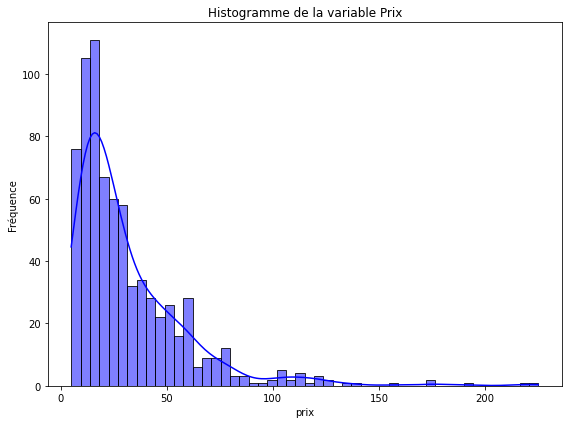

Graphe de densité:


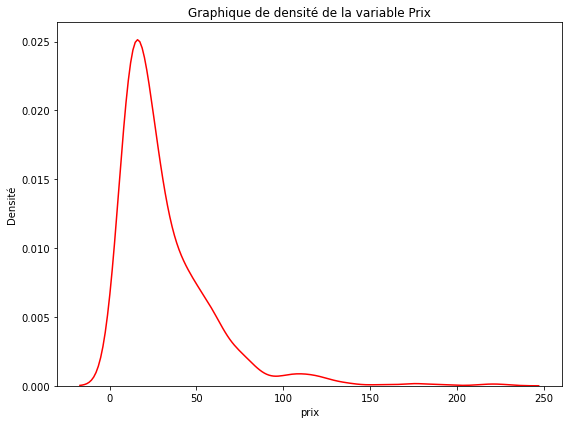

In [38]:
# Analyse sur la variable 'prix':

# Tracçage de l'histogramme et du graphique de densité de la Variable Prix

plt.figure(figsize=(8,6))
sns.histplot(data=produit_web, x='prix', bins=50, kde=True, color='blue', alpha=0.5)
plt.xlabel('prix')
plt.ylabel('Fréquence')
plt.title('Histogramme de la variable Prix')
plt.tight_layout()
plt.show()

print('Graphe de densité:')
plt.figure(figsize=(8,6))
sns.kdeplot(data=produit_web, x='prix', color='red')
plt.xlabel('prix')
plt.ylabel('Densité')
plt.title('Graphique de densité de la variable Prix')
plt.tight_layout()
plt.show()


> **Nous voyons une distribution de données asymétriques.**
> Pour **détecter les valeurs aberrantes**, nous utilisons deux méthodes pour comparer les résultats. Les méthodes z-score et IQR.

> - L'IQR est une mesure de la dispersion des données qui est calculée comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1). Les limites supérieures et inférieures sont définies comme Q3 + 1,5 * IQR et Q1 - 1,5 * IQR, respectivement. Toute valeur qui se situe en dehors de ces limites est considérée comme une valeur aberrante.

> - La méthode de Z-score, quant à elle, utilise les écarts-types des données pour déterminer les limites supérieures et inférieures. Les valeurs dont le Z-score est supérieur à un certain seuil (généralement 3) sont délivrées comme des valeurs aberrantes.

### <a id="B3.1">3.1. Détection et listing des valeurs aberrantes </a>

#### a) La Methode Z-score 

In [39]:
# 1. Sélection de la variable 'prix'

prix_produit = produit_web['prix'] 

# 2. Résumé Statistique des données

print(color.BOLD+'Résumé statistique des prix:'+color.END)
display(prix_produit.describe())

Résumé statistique des prix:


count    734.000000
mean      31.797003
std       27.598781
min        5.000000
25%       14.000000
50%       23.000000
75%       41.000000
max      225.000000
Name: prix, dtype: float64

In [40]:
# 3. Détection des Valeurs aberrantes

z_score = (prix_produit - prix_produit.mean()) / prix_produit.std()  # Calcul du Z-score

outliers = prix_produit[np.abs(z_score) > 3]  # Condition de détection des valeurs aberrantes: prix supérieurs à 3 écarts-types de la moyenne

# 4. Listing des Valeurs aberrantes

print(color.BOLD+'Liste des valeurs aberrantes:'+color.END)
print(outliers)

Liste des valeurs aberrantes:
200    225
202    126
219    176
222    157
387    137
434    217
524    124
566    175
601    191
617    122
661    135
667    116
672    115
673    121
675    115
676    121
Name: prix, dtype: int32


In [41]:
# 5. Affichage des produits avec des valeurs aberrantes
    
print('')
print(color.BOLD+'Liste des Produits correspondant aux valeurs aberrantes:'+color.END, outliers.shape[0])
produit_web[['ref_produit', 'ref_web', 'enVente','nom_produit','prix','nbre_ventes','CA', 'quantite_stock', 'stock_status']].loc[produit_web['prix'].isin(outliers)]


Liste des Produits correspondant aux valeurs aberrantes: 16


,ref_produit,ref_web,enVente,nom_produit,prix,nbre_ventes,CA,quantite_stock,stock_status
200,4352,15940,1,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225,5.0,1125.0,0,outofstock
202,4355,12589,1,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126,11.0,1386.0,2,instock
219,4402,3510,1,Cognac Frapin VIP XO,176,13.0,2288.0,8,instock
222,4406,7819,1,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157,0.0,0.0,3,instock
387,4904,14220,1,Domaine Des Croix Corton Charlemagne Grand Cru...,137,5.0,685.0,13,instock
434,5001,14581,1,David Duband Charmes-Chambertin Grand Cru 2014,217,0.0,0.0,20,instock
524,5612,14915,1,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124,0.0,0.0,12,instock
566,5767,15185,1,Camille Giroud Clos de Vougeot 2016,175,0.0,0.0,12,instock
601,5892,14983,1,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191,3.0,573.0,10,instock
617,5917,14775,1,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,122,0.0,0.0,4,instock


In [42]:
# 6- Calcul du CA des outliers

produits_outliers = produit_web[['ref_produit', 'ref_web','nom_produit','prix','nbre_ventes','CA']].loc[produit_web['prix'].isin(outliers)]
CA_outliers = produits_outliers['CA'].sum()
print("Chiffre d'affaires Total des Outliers:",color.BOLD+ f"{CA_outliers:,}", '€.'+color.END)

# Calcul du pourcentage du CA des outliers

pourcent_CA_outliers = round(CA_outliers * 100 / CA_total, 2)
print('Les valeurs aberrantes représentent', color.BOLD+ f"{pourcent_CA_outliers:,}"+color.END, '% du CA total.')

Chiffre d'affaires Total des Outliers: 6,557.0 €.
Les valeurs aberrantes représentent 9.46 % du CA total.


#### b) La Méthode IQR (interquartile range) 

In [43]:
# Calculer Q1, Q3 et IQR

Q1 = produit_web['prix'].quantile(0.25)
Q3 = produit_web['prix'].quantile(0.75)

IQR = Q3 - Q1

# Calculer les limites supérieure et inférieure

lim_sup = Q3 + 1.5 * IQR
lim_inf = Q1 - 1.5 * IQR

print('Limite supérieure:', lim_sup)
print('Limite inférieure:', lim_inf)

# Identifier les valeurs aberrantes

outliers2 = produit_web.loc[(produit_web['prix'] < lim_inf) | (produit_web['prix'] > lim_sup)]
print('Les valeurs aberrantes sont :', outliers2.shape[0])
print('Nombre de valeurs aberrantes en-dessous de la limite inférieure:', produit_web.loc[produit_web['prix'] < lim_inf].shape[0])
print('Nombre de valeurs aberrantes au-dessus de la limite supérieure:', produit_web.loc[produit_web['prix'] > lim_sup].shape[0])
outliers2

Limite supérieure: 81.5
Limite inférieure: -26.5
Les valeurs aberrantes sont : 34
Nombre de valeurs aberrantes en-dessous de la limite inférieure: 0
Nombre de valeurs aberrantes au-dessus de la limite supérieure: 34


,ref_produit,enVente,prix,quantite_stock,stock_status,ref_web,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,CA
63,4115,1,100,11,instock,15382,0.0,0.0,0.0,0.0,...,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0
65,4132,1,88,5,instock,11668,0.0,0.0,0.0,0.0,...,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0
197,4337,1,83,13,instock,4679,0.0,0.0,0.0,0.0,...,2020-07-08 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0
200,4352,1,225,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1125.0
202,4355,1,126,2,instock,12589,0.0,0.0,0.0,0.0,...,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1386.0
206,4359,1,85,0,outofstock,13853,0.0,0.0,0.0,0.0,...,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,85.0
219,4402,1,176,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2288.0
220,4404,1,108,2,instock,3507,0.0,0.0,0.0,0.0,...,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,216.0
222,4406,1,157,3,instock,7819,0.0,0.0,0.0,0.0,...,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0
223,4407,1,104,6,instock,3509,0.0,0.0,0.0,0.0,...,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,104.0


> Avec la méthode IQR nous avons deux fois plus de valeurs aberrantes. Bien évidemment, tout cela reste à vérifier si les prix sont réels.

### <a id="B3.2">3.2. Représentation graphique des valeurs aberrantes</a>

Nous utilisons la bibliothèque Seaborn pour représenter les valeurs aberrantes sous forme de graphique.


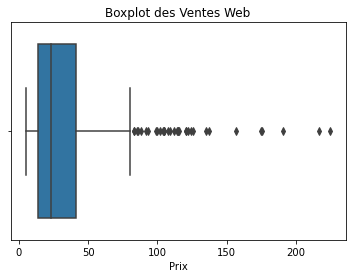

Ce graphique affiche un boîtier qui représente la répartition des prix, les points en dehors du boîtier sont considérés  comme des valeurs aberrantes.


In [44]:
# Représentation graphique des valeurs aberrantes

sns.boxplot(prix_produit)

plt.xlabel("Prix")
plt.title("Boxplot des Ventes Web")

plt.show()
print('Ce graphique affiche un boîtier qui représente la répartition des prix,', color.BOLD+'les points en dehors du boîtier sont considérés  comme des valeurs aberrantes.'+color.END)

## Observations: 

>- Les **valeurs aberrantes** trouvées ne signifient **pas forcément qu'elles sont erronées**. Il est judicieux de **vérifier** si elles correspondent bien au **prix réel des produits**. 

>- Parmi les **outliers**, seulement **7 produits sur 16 ont été vendus**. Et ils représentent **9.46 %** du CA total, ce qui est une part **non négligeable**.